# Decision Tree

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alinaali/Data_Science_and_Machine_Learning/blob/main/Supervised%20Learning/Decision_Regression%20Trees/Decision_Regression_Tree.ipynb)

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

 ---

<p align="center">
    <img src="decision_tree.png" width="700" hight ="800">
</p>

---


# Advantages of a Decision Tree

A decision tree is needed when we want to make a decision on a particular problem and it helps to show the clear calculation and possibility of the outcome. So it is very useful in many ways. Here are some Advantages of the Decision Tree

- Easy to create: A decision tree is easy to create as compared to other algorithms. Using the raw data collocation, we can simply create the decision tree with its decision-making nodes and come to an outcome.
- Easy to Understand: A Decision tree is a very simple representation and thus it is easy to understand by anyone. If the person does not work in  AI (Artificial Intelligence) then also it is easy for them to understand the changes and outcomes.
- Data cleaning reduced: The Decision tree is made with very little data and is also easy to make and understand, so unnecessary data collection is avoided. The cleaning of data is reduced.
- Data exploration: It is one of the best ways to understand the factors and variables that are included in the calculation and helps in decision making by exploring the various factors and data input. Thus it allows the exploration of all the changing variables.
- Used for Nonlinear relationships: One of the big advantages of the decision tree is that it is also helpful in dealing with nonlinear relationships.
- Less preparation of Data: with very little data, the decision can be created because it does not require any external data in the making.

# Disadvantages of Decision Tree
Some disadvantages of a Decision Tree are as follows

- Unstable Nature: A decision tree structure is usually get affected by the change in the small data. So it is unstable in nature and cannot be totally dependable.
- Inaccurate: It can be inaccurate if the variable data is changing often thus, the outcome comes differently every time if we are dealing with variable change. Thus we can not totally rely on it.
- Complex with new input: It gets complex with adding the new input and the outcome can be more making it complex.
- Time Taking: For a small tree, it is easy and can be in little time, but if the inputs are more, then it is more time-consuming as compared to other methods

# DataSet

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

## Importing Packages/Libraries

The first step is to import libraries. 

- Import Numpy
- Import Pandas
- Import Matplotlib
- Import Seaborn
- Import Plot Decision Regions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

heart disease dataset is being used in this Decision Tree algorithm.

In [3]:
heart_data = pd.read_csv('heart.csv')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Data Visualization

<Figure size 720x720 with 0 Axes>

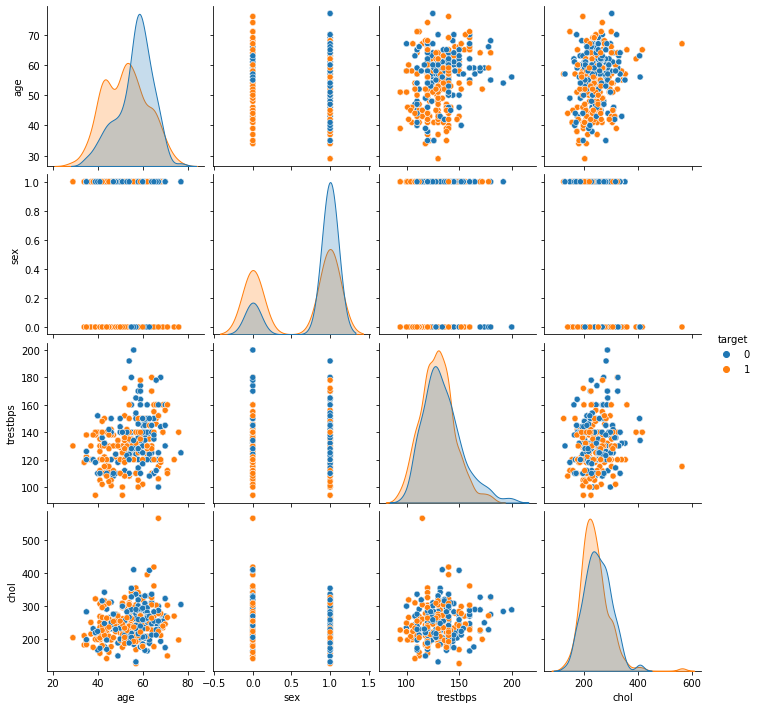

In [4]:
plt.figure(figsize=(10, 10))
sns.pairplot(
    heart_data,
    hue ='target',
    vars=['age', 'sex', 'trestbps', 'chol'],
    diag_kind='kde',
    
)
plt.show()

In [5]:
X = heart_data[['age','chol']]
y = heart_data['target']

In [6]:
X= X.to_numpy()
y = y.to_numpy ()

In [7]:
colors = ['steelblue' if label == 0 else 'darkorange' for label in y]

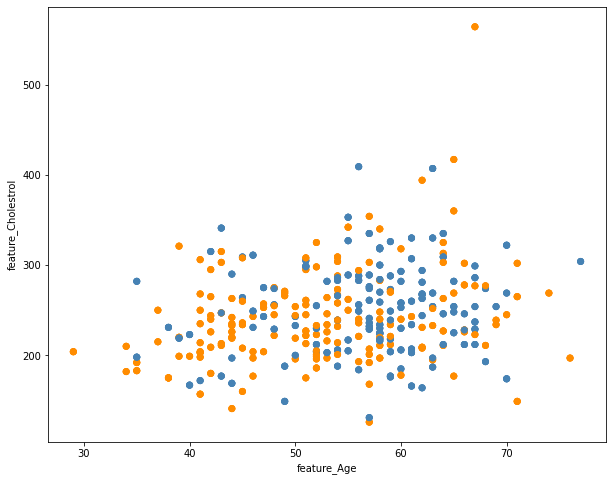

In [8]:
plt.figure (figsize=(10,8))
plt.scatter (X[:,0], X[:,1], c= colors)
plt.xlabel ('feature_Age')
plt.ylabel ('feature_Cholestrol')
plt.show ()

# Train-Test Split Data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.4, random_state =42)

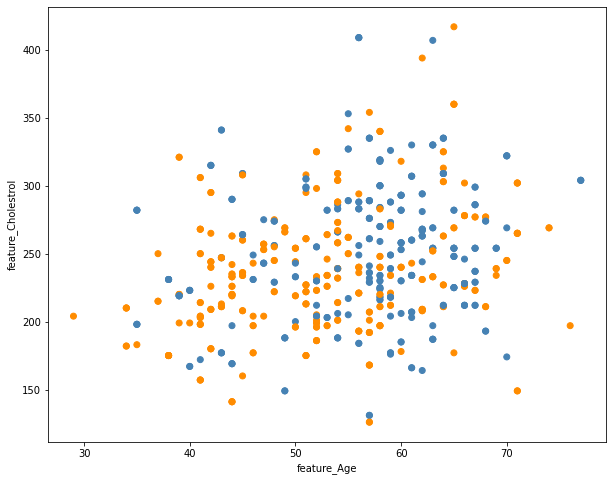

In [10]:
c_train = ['steelblue' if label == 0 else 'darkorange' for label in y_train]
c_test = ['steelblue' if label == 0 else 'darkorange' for label in y_test]
plt.figure (figsize =(10,8))

plt.scatter (X_train[:,0], X_train [:,1], c= c_train)
plt.xlabel ('feature_Age')
plt.ylabel ('feature_Cholestrol')
plt.show ()

In [11]:
features = ['X_0','X_1']
labels = ['orange','blue']

# Decision Tree Model

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

In [41]:
decision_tree = DecisionTreeClassifier(max_depth =15, random_state =42)

In [42]:
decision_tree.fit (X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

## Predicting & Visualizing the test results

In [43]:
print ('decision_tree')
print (metrics.classification_report(y_test, decision_tree.predict(X_test)))

decision_tree
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       202
           1       0.96      0.93      0.95       208

    accuracy                           0.95       410
   macro avg       0.95      0.95      0.95       410
weighted avg       0.95      0.95      0.95       410



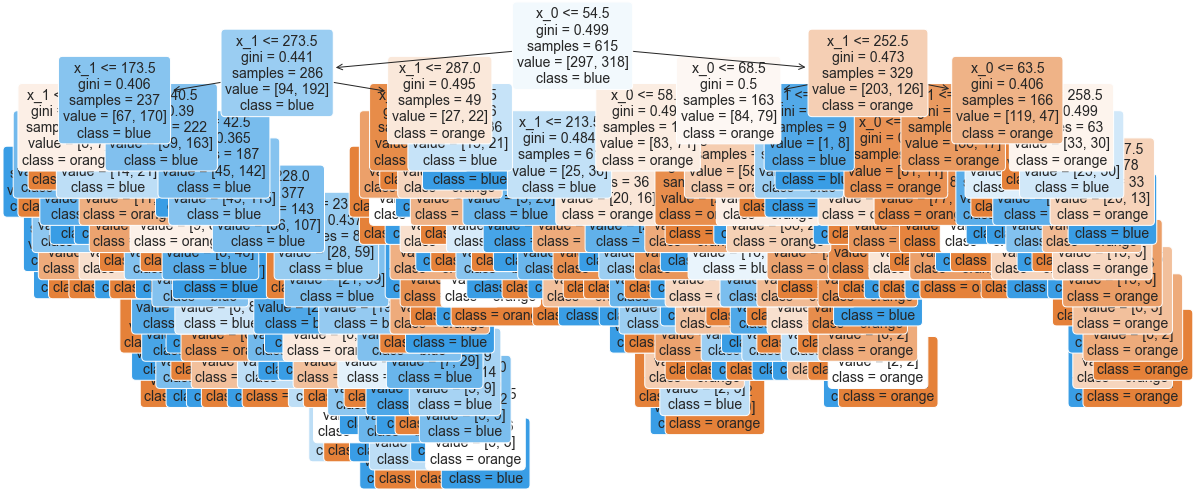

In [44]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["x_0", "x_1"],
                   class_names = ["orange", "blue"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show ()

In [45]:
from sklearn.tree import export_text

tree_rules = export_text (decision_tree, feature_names =features)
print (tree_rules)

|--- X_0 <= 54.50
|   |--- X_1 <= 273.50
|   |   |--- X_1 <= 173.50
|   |   |   |--- X_1 <= 163.50
|   |   |   |   |--- X_0 <= 47.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- X_0 >  47.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- X_1 >  163.50
|   |   |   |   |--- class: 0
|   |   |--- X_1 >  173.50
|   |   |   |--- X_0 <= 40.50
|   |   |   |   |--- X_1 <= 217.00
|   |   |   |   |   |--- X_0 <= 36.00
|   |   |   |   |   |   |--- X_0 <= 34.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- X_0 >  34.50
|   |   |   |   |   |   |   |--- X_1 <= 190.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- X_1 >  190.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- X_0 >  36.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- X_1 >  217.00
|   |   |   |   |   |--- X_0 <= 37.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- X_0 >  37.50
|   |   |   |   |   |   |--- X_1 <= 2

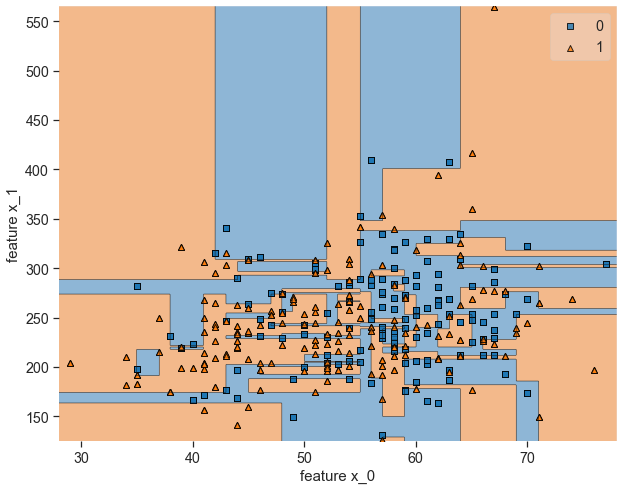

In [46]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

# Test and Evaluation

In [47]:
y_pred = decision_tree.predict (X_test)

# import metrics from sklearn
from sklearn import metrics
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix (y_test, y_pred)

# Convert confusion matrix into dataframe
matrix_dt = pd.DataFrame (confusion_matrix)

# Confusion Matrix

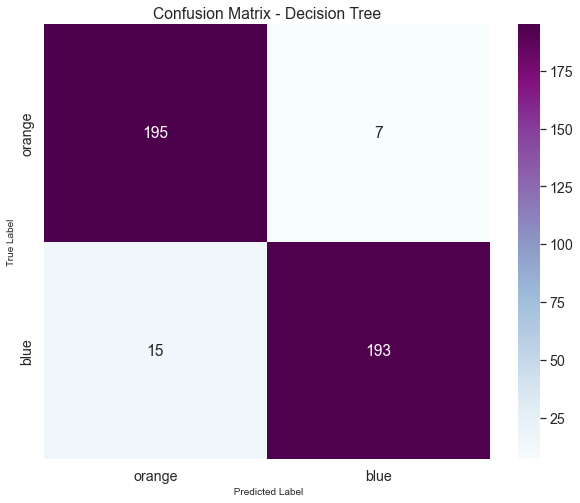

In [49]:
plt.figure (figsize =(10,8))

ax= plt.axes ()
sns.set (font_scale =1.3)
sns.heatmap(matrix_dt, 
            annot =True,
           fmt = 'g',
           ax = ax,
          cmap="BuPu")

ax.set_title ('Confusion Matrix - Decision Tree')
ax.set_xlabel (' Predicted Label', fontsize =10)
ax.set_xticklabels (["orange", "blue"])
ax.set_ylabel ('True Label', fontsize =10)
ax.set_yticklabels (["orange", "blue"])
plt.show ()

# Accuracy and Classification Report

In [50]:
print (f'accuracy score = { metrics.accuracy_score (y_test, y_pred)}')

accuracy score = 0.9463414634146341


In [51]:
print (f'precision score')
precision = metrics.precision_score (y_test,
                                     y_pred,
                                    average = None)

precision_results = pd.DataFrame (precision, index = labels)
precision_results.rename (columns= {0:'precison'}, inplace = True)
precision_results

precision score


,precison
blue,0.928571
orange,0.965000


In [52]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       202
           1       0.96      0.93      0.95       208

    accuracy                           0.95       410
   macro avg       0.95      0.95      0.95       410
weighted avg       0.95      0.95      0.95       410



# Regression Tree

A regression tree is a type of decision tree. It uses sum of squares and regression analysis to predict values of the target field. The predictions are based on combinations of values in the input fields.

A regression tree calculates a predicted mean value for each node in the tree. This type of tree is generated when the target field is continuous.

# Data Set

I am using Diabetes dataset from Sklearn 
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

- age age in years
- sex
- bmi body mass index
- bp average blood pressure
- s1 tc, total serum cholesterol
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, total cholesterol / HDL
- s5 ltg, possibly log of serum triglycerides level
- s6 glu, blood sugar level

## Importing Packages/Libraries

The first step is to import libraries. 

- Import Numpy
- Import Pandas
- Import Matplotlib
- Import Seaborn
- Import Plot Decision Regions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

# Target is median house value 
X, y = load_diabetes(return_X_y = True)

I am checking the X and y shape

In [2]:
np.shape(X)

(442, 10)

In [3]:
np.shape(y)

(442,)

# Train/Test Split Data 

Here in the below cell, I am using max_depth = 1. and fitting the model

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

reg = DecisionTreeRegressor(max_depth=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

# Predicting & Calculatting Mean Squared Error (MSE) 

I am using max_depth= 1 and max_depth= 10 to do comparision. 

In [5]:
from sklearn.metrics import mean_squared_error

reg1 = DecisionTreeRegressor(max_depth=1, random_state =12 )
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=10, random_state = 12)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

MSE reg1: 4488.292921976607 

MSE reg2: 6243.818980455796 



# Error Analysis

I am not sure why the MSE is too large for this Regression Tree Algorithm. I tried different max_depth but still haven't figured out the problem.

# References

1. https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

2. https://cbselibrary.com/advantages-and-disadvantages-of-decision-tree/

3. https://www.saedsayad.com/decision_tree_reg.htm